In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [13]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url)

In [14]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


1. For the "Median value of owner-occupied homes" provide a boxplot:

    Result: The boxplot below depicts the median value for the variable MEDV  with outliers and median(22)

Text(0.5, 1.0, 'boxplot of owner-occupied homes')

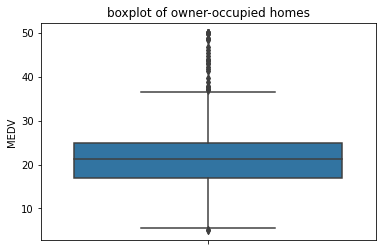

In [15]:
sns.boxplot(data=df , y='MEDV')
plt.title("boxplot of owner-occupied homes")

2. Provide a  bar plot for the Charles river variable

    Result: the bar plot shows that most of the houses are not near the river 

Text(0.5, 1.0, ' bar plot for the Charles river variable')

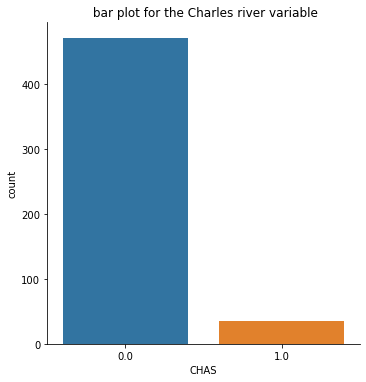

In [16]:
sns.catplot(kind="count" , x="CHAS" , data=df)
plt.title(" bar plot for the Charles river variable")

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

    Result: the Median value of owner-occupied homes is higher in 35 years and younger category 

In [17]:
df.loc[(df["AGE"] <=35) ,'Age_cat' ]="35 years and younger"
df.loc[(df["AGE"] >35) & (df["AGE"]<70) ,'Age_cat' ]="between 35 and 70"
df.loc[(df["AGE"] >= 70) ,'Age_cat' ]="70 years and older"

Text(0.5, 1.0, ' boxplot for the MEDV variable vs the AGE variable')

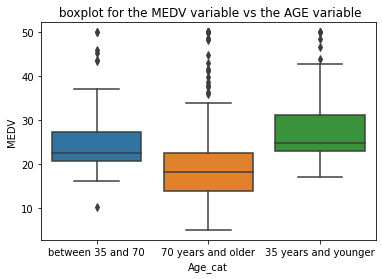

In [18]:
sns.boxplot(data=df , y='MEDV' , x='Age_cat')
plt.title(" boxplot for the MEDV variable vs the AGE variable")

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
    What can you say about the relationship?
    
    Result: In the first part of the values, there is an upward trend, and afterward, there is no relation between them 

Text(0.5, 1.0, 'relationship between NNOX and INDUS')

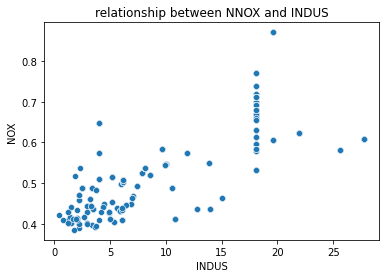

In [19]:
sns.scatterplot(data=df , x='INDUS' , y='NOX')
plt.title("relationship between NNOX and INDUS")

5. Create a histogram for the pupil to teacher ratio variable
    Result:the histogram shows that the pupil to teacher ratio variable is hight between 20 -21

Text(0.5, 0, 'PTRATIO')

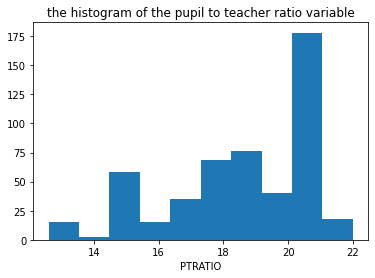

In [23]:
plt.hist(x="PTRATIO" , data=df )
plt.title("the histogram of the pupil to teacher ratio variable")
plt.xlabel("PTRATIO")

#  Hypothesis Tests

6. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [27]:
df1=df[df['CHAS']==0].MEDV
df2=df[df['CHAS']==1].MEDV

In [28]:
t_statistic, p_value = stats.ttest_ind(df1, df2)

In [36]:
print(f"F-Statistic:{t_statistic}")
print(f"P-Value:{p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:-3.996437466090509
P-Value:1.7105011022702984e-15
Reject null hypothesis: Means are significantly different.


7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [37]:
g1=df[df['Age_cat']=="35 years and younger"]['MEDV']
g2=df[df['Age_cat']=="between 35 and 70"]['MEDV']
g3=df[df['Age_cat']=="70 years and older"]['MEDV']
f_Statistic , p_value=stats.f_oneway(g1 , g2 , g3)


In [38]:
print(f"F-Statistic:{f_Statistic}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:36.40764999196599
P-Value:1.7105011022702984e-15
Reject null hypothesis: Means are significantly different.


8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [39]:
x=df["INDUS"]
y=df["NOX"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print(f"F-Statistic:{correlation_coefficient}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:0.763651446920915
P-Value:7.913361061239593e-98
Reject null hypothesis: Means are significantly different.


9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

    Result: There is an impact of 1.0916 distance to the five Boston employment centers on the median value of owner-occupied homes.

In [41]:
X = df['DIS']
y = df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        19:10:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""